In [1]:
from minermeta import MinerMeta


In [2]:
m = MinerMeta()
df = m.compile_lc_data(read_csv=True)


In [3]:
m.build_xgb()

c:\Users\jadav\prod\env\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[0]	eval-rmse:65.15845	train-rmse:61.41267
[1]	eval-rmse:6.01932	train-rmse:5.77257


In [4]:
m.predict_and_plot()


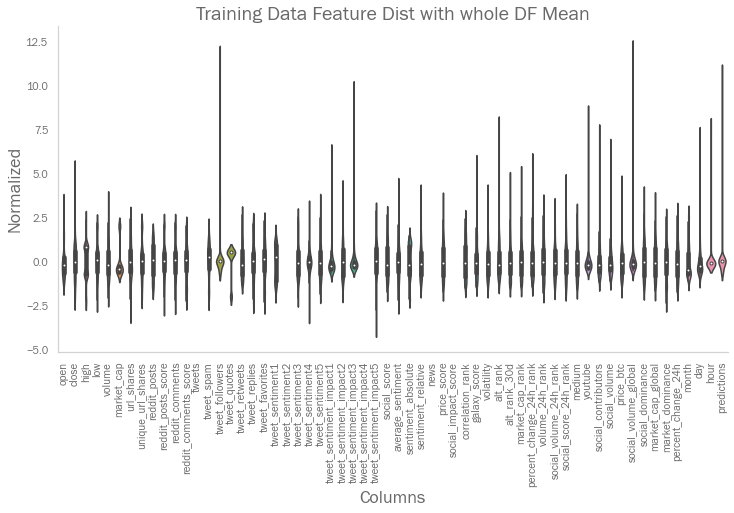

In [5]:
m.plot_feature_dist()

In [6]:
m.df

,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,...,price_btc,social_volume_global,social_dominance,market_cap_global,market_dominance,percent_change_24h,month,day,hour,predictions
time,,,,,,,,,,,,,,,,,,,,,
2022-04-29 20:00:00,2799.880428,2814.409274,2821.468240,2798.062853,9.088316e+08,339119127655,3628,1472,25,128,...,0.072810,102306,16.465310,1826386732365,18.567761,-4.842435,4,29,20,2814.016357
2022-04-29 21:00:00,2812.214481,2813.232216,2822.603773,2805.121487,5.478437e+08,339299112974,2967,1199,21,1685,...,0.072851,96018,14.707659,1825363207974,18.588033,-4.416955,4,29,21,2813.750244
2022-04-29 22:00:00,2813.220359,2824.432511,2826.933490,2802.556749,5.815465e+08,340407565815,2313,1109,18,20,...,0.072990,106778,12.158872,1829153236992,18.610117,-3.760269,4,29,22,2824.743652
2022-04-29 23:00:00,2827.988491,2826.136205,2831.951514,2818.517676,4.984357e+08,340269947880,2218,970,8,6,...,0.073172,83271,13.268725,1828246931156,18.611816,-3.967645,4,29,23,2826.029785
2022-04-30 00:00:00,2822.390635,2831.535791,2834.027555,2819.112453,7.158571e+08,341199091672,1736,857,13,115,...,0.073325,68305,14.520167,1831871019424,18.625716,-3.935621,4,30,0,2830.590332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-06 16:00:00,2697.694279,2719.596348,2722.209710,2695.399415,1.366006e+09,328215482154,2782,842,29,171,...,0.074840,122126,15.452074,1741153188896,18.850466,-1.996527,5,6,16,2702.645508
2022-05-06 17:00:00,2722.432637,2698.578886,2724.171206,2693.798860,1.153448e+09,325389087529,2483,860,33,131,...,0.074811,113604,14.207246,1729707089751,18.811803,-2.140554,5,6,17,2701.022949
2022-05-06 18:00:00,2699.517697,2699.353063,2709.214191,2689.905274,9.238993e+08,325975446968,2825,951,33,285,...,0.074643,112414,15.239205,1732445262538,18.815916,-1.466915,5,6,18,2701.022949


In [7]:
from datetime import datetime, timedelta
import pandas as pd
tmp = m.df.copy()
tmp.index = pd.to_datetime(tmp.index)
num_days = tmp.index.max() - tmp.index.min()
num_days

Timedelta('7 days 00:00:00')

In [8]:
delta = timedelta(days=3)
start = tmp.index.max() - delta
tmp = tmp[tmp.index >= start]
num_days = tmp.index.max() - tmp.index.min()
num_days

Timedelta('3 days 00:00:00')

<AxesSubplot:xlabel='time'>

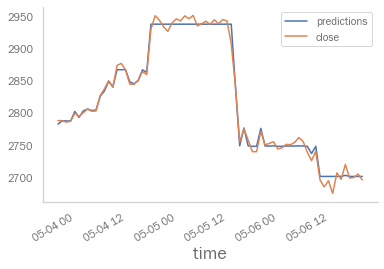

In [9]:
tmp.plot(y=["predictions", "close"], use_index=True)

In [10]:
tmp['dif'] = tmp.close - tmp.predictions

In [11]:
tmp[['close','predictions','dif']]

,close,predictions,dif
time,,,
2022-05-03 20:00:00,2787.890457,2782.237061,5.653396
2022-05-03 21:00:00,2787.491835,2787.322021,0.169814
2022-05-03 22:00:00,2785.414237,2787.322021,-1.907785
2022-05-03 23:00:00,2786.727048,2787.076904,-0.349856
2022-05-04 00:00:00,2799.405249,2802.067871,-2.662622
...,...,...,...
2022-05-06 16:00:00,2719.596348,2702.645508,16.950840
2022-05-06 17:00:00,2698.578886,2701.022949,-2.444063
2022-05-06 18:00:00,2699.353063,2701.022949,-1.669886


In [12]:
tmp.dif.mean()

0.039751336857864784

<AxesSubplot:xlabel='time'>

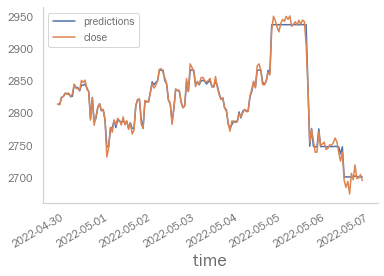

In [13]:
m.plot_day(num_days = 7)


<AxesSubplot:ylabel='Frequency'>

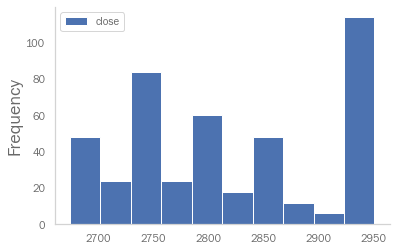

In [14]:
tmp.plot.hist(y=["close"], use_index=True)


<AxesSubplot:ylabel='Frequency'>

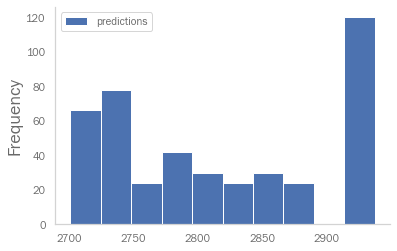

In [15]:
tmp.plot.hist(y=["predictions"], use_index=True)


In [19]:
from statsmodels.tsa.stattools import adfuller

x = m.df.close.values
result = adfuller(x)
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))


ADF Statistic: -7.831672
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [20]:
result

(-7.8316720196860015,
 6.268974856622078e-12,
 22,
 991,
 {'1%': -3.4369658620871286,
  '5%': -2.8644609013346485,
  '10%': -2.56832523159495},
 8689.484555078165)